# Kernel Ridge Regression Analysis

This Jupyter Notebook demonstrates the process of performing Kernel Ridge Regression on a dataset retrieved from a remote database. The notebook includes the following steps:

1. **Importing Necessary Libraries**: Importing essential libraries and modules required for data manipulation, database connection, and kernel ridge regression.
2. **Database Connection**: Establishing a connection to a remote database to fetch the desired dataset.
3. **Data Preparation**: Loading the dataset into a pandas DataFrame and preparing the data for regression analysis.
4. **Kernel Functions**: Defining various kernel functions such as Gaussian, Polynomial, Linear, and Logistic kernels.
5. **Kernel Ridge Regression**: Applying Kernel Ridge Regression using the defined kernel functions and visualizing the results.

This notebook is designed to provide a comprehensive guide for performing Kernel Ridge Regression, making it easier for readers to understand and implement the process in their own projects.

In [1]:
import sys
sys.path.append('..')
import os
import dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import src.kernel_ridge as kr

In [ ]:
dotenv.load_dotenv()

#### Connection to remote database

In [ ]:
dict_data_frame = {1: ('df_regresion_nolineal_1','x','y'),
                   2: ('df_regresion_nolineal_2','x','y'),
                   3: ('df_regresion_nolineal_3','x','y'),
                   4: ('temp','fecha','temp'),}
desired_dataset = 4

In [ ]:
connection = mysql.connector.connect(
    host=os.getenv('DB_HOST'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    database=os.getenv('DB_NAME')
)

In [ ]:
cursor = connection.cursor()
cursor.execute('SELECT * FROM {}'.format("sistemas_inteligentes_iv."+ dict_data_frame[desired_dataset][0]))
datos = cursor.fetchall()
cursor.close()
connection.close()

In [ ]:
data_frame = pd.DataFrame(datos, columns=['id', dict_data_frame[desired_dataset][1], dict_data_frame[desired_dataset][2]])
data_frame.drop(columns=['id'], inplace=True)
print(data_frame)

In [ ]:
y = data_frame[dict_data_frame[desired_dataset][2]].to_numpy()
x = data_frame[dict_data_frame[desired_dataset][1]].to_numpy().reshape(-1, 1)

if desired_dataset == 4:
    x = x[0:-1:4]
    y = y[0:-1:4]
x.shape, y.shape

In [2]:
data_frame = pd.read_csv(r"C:\github\kernel-ridge\datasets\temp.csv")

x = data_frame['x'].to_numpy().reshape(-1,1)
y = data_frame['y'].to_numpy()

x = x[0:-1:4]
y = y[0:-1:4]

In [3]:
x_std_dev = np.std(x)
x_mean = np.mean(x)
x = (x-x_mean)/x_std_dev

y_std_dev = np.std(y)
y_mean = np.mean(y)
y = (y-y_mean)/y_std_dev

print(x_mean)

11385.0


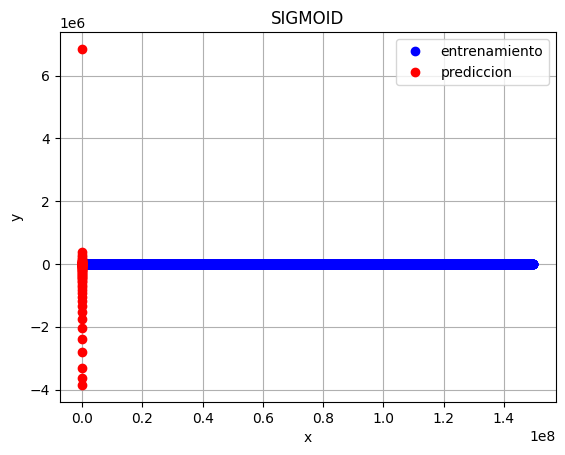

In [5]:
X_test = np.linspace(0,20000 , 100).reshape(-1, 1)
X_test = (X_test-x_mean)/x_std_dev

name_array = ['LINEAR','RBF', 'POLY', 'SIGMOID'] 
name = name_array[3]

predicciones = kr.kernel_ridge_regression(x, y, kernel=name, param=0.01, reg=0.1, X_test=X_test, add_bias=True)

x = (x*x_std_dev)+x_mean
y = (y*y_std_dev)+y_mean
X_test = (X_test*x_std_dev)+x_mean
predicciones = (predicciones*y_std_dev)+y_mean
kr.plot_kernel_ridge(x, y, X_test,predicciones,name)